In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Diametro (cm)
d = [[7],[10],[15],[30],[45]]

#Preços (R$)
p = [[8],[11],[16],[38.5],[52]]

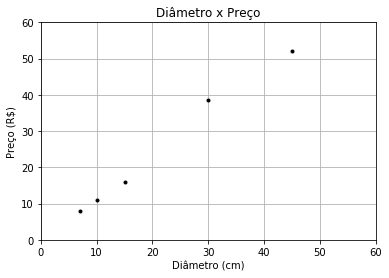

In [3]:
plt.figure()
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Preço (R$)')
plt.title('Diâmetro x Preço')
plt.plot(d, p, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

In [4]:
#Importando o módulo de Regressão Linear 
from sklearn.linear_model import LinearRegression

In [5]:
X = [[7],[10],[15],[30],[45]]
Y = [[8],[11],[16],[38.5],[52]]

In [6]:
#Criando o modelo
modelo = LinearRegression()

In [7]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [8]:
#Treinando o modelo
modelo.fit(X,Y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#modelo.predict([[24],[0]])

In [10]:
## Prevendo o preço de uma pizza de 20cm de diâmetro
print('Uma pizza de 20 cm de diâmetro deve custar: R$%.2f' % modelo.predict([[20]]))

Uma pizza de 20 cm de diâmetro deve custar: R$23.41


##### O método fit() do modelo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples

In [11]:
!pip install Ipython


#### Construindo um Scatter Plot

In [12]:
print('Coeficiente: \n', modelo.coef_)

Coeficiente: 
 [[1.20422117]]


In [13]:
# Erro quadratico (MSE)
print('EQ: %.2f' %np.mean((modelo.predict(X)-Y)**2))

EQ: 2.74


In [14]:
#Score de variação: 1 representa predição perfeita
print('EQ: %.2f' %modelo.score(X,Y))

EQ: 0.99


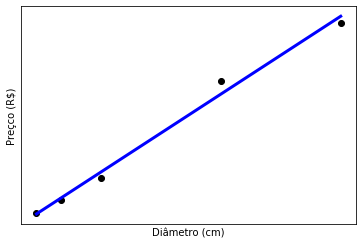

In [15]:
# Scatter plot representando a regressão linear
plt.scatter(X, Y, color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Preçco (R$)')
plt.xticks(())
plt.yticks(())
plt.show()

2. ### Explorando o Dataset Boston Housing

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()

In [18]:
type(boston)

sklearn.utils.Bunch

In [19]:
boston.data.shape

(506, 13)

In [20]:
# descrição do dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [22]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
#Adicionando o preço de cada casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
#df.drop('PREÇO',1)

In [27]:
#df.head()

## Prevendo o preço das casas em Boston

#### Y -  variável dependente (preço das casas)
#### X - variaveis independentes ou explanatórias (todas as outras caracteristicas da casa)

In [28]:
#Definindo Y
Y = df.PRICE

In [29]:
# Não queremos o preço da casa como var. dependente
X = df.drop(['PRICE'], 1)

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


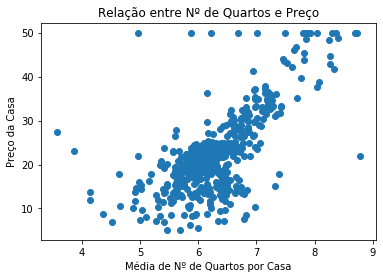

In [31]:
plt.scatter(df.RM, Y)
plt.xlabel('Média de Nº de Quartos por Casa')
plt.ylabel('Preço da Casa')
plt.title('Relação entre Nº de Quartos e Preço')
plt.show()

In [32]:
#Criando objeto de regressão linear
reg= LinearRegression()

In [33]:
type(reg)

sklearn.linear_model.base.LinearRegression

In [34]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('Coeficiente: ',reg.intercept_)
print('Número de Coeficientes: ',len(reg.coef_))

Coeficiente:  36.459488385089855
Número de Coeficientes:  13


In [36]:
# isso nao é iedal (envolve overfit), mas só um exemplo para ilustrar
reg.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

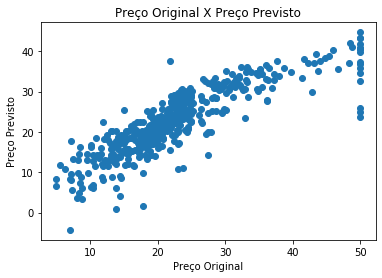

In [37]:
#Comparando preços originais x preços previstos
plt.scatter(df.PRICE, reg.predict(X))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original X Preço Previsto')
plt.show()

### Ver os erros cometidos na prediação do preço das casas

In [38]:
mse1 = np.mean((df.PRICE -reg.predict(X))**2)
mse1

21.894831181729202

In [39]:
#Aplicando regressão linear para apenas uma variavel e calculando o MSE
reg = LinearRegression()
reg.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - reg.predict(X[['PTRATIO']]))**2)
mse2

62.652200013769274

### Note que o Erro Quadratico aumentou. Isso indica que uma caracteristica( variavel) não é um bo predictor para o preço das casas

##### Na pratica vc nao vai implementar regressão linear em toso o dataset. Vc vai dividir o dataset em dataset de treino e de teste. Assim, vc treina seu modelo nos dados e depois verifica como o modelo se comprta nos seus dados de tste

#### Essa nao é a forma correta de dividir o dataset

In [40]:
# Dividindo X em dataset de treino e de teste
x_treino = X[:-50]
x_teste = X[:-50]

# Dividindo Y em dataset de treino e de teste
y_treino = df.PRICE[:-50]
y_teste = df.PRICE[:-50]

#Imprimindo o shape dos datasets
print(x_treino.shape, x_teste.shape,y_treino.shape, y_teste.shape)

(456, 13) (456, 13) (456,) (456,)


#### Podemos criar nossos datasets de treino de forma manual, mas claro, este não é o método correto. Dividimos os datasets randomicamente. O Scikit-Learn provê uma função randomica chamada train_test_split() para isso

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Dividir X e Y em dataset de treino e de teste
x_treino, x_teste,y_treino, y_teste = train_test_split(X, df.PRICE, test_size=0.30, random_state=5)

In [43]:
print(x_treino.shape, x_teste.shape,y_treino.shape, y_teste.shape)

(354, 13) (152, 13) (354,) (152,)


In [44]:
# Construindo novo modelo de regressão
reg = LinearRegression()

In [45]:
#Treinando o modelo
reg.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Definindo dados de treino e de teste
pred_trino = reg.predict(x_treino)
pred_teste = reg.predict(x_teste)

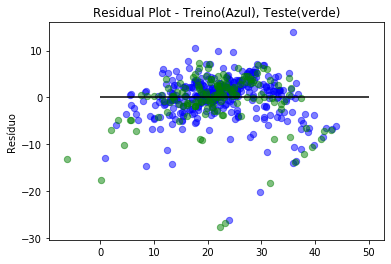

In [47]:
#Comparando preços originais X preços previstos
plt.scatter(reg.predict(x_treino), reg.predict(x_treino)- y_treino, c= 'b', s=40, alpha=0.5)
plt.scatter(reg.predict(x_teste), reg.predict(x_teste)- y_teste, c= 'g', s=40, alpha=0.5)
plt.hlines(y=0 , xmin= 0, xmax= 50)
#plt.xlabel('')
plt.ylabel('Resíduo')
plt.title('Residual Plot - Treino(Azul), Teste(verde)')
plt.show()

## BOKEH
##### permite a construção de gráficos com intertividade de alto desempenho em conjuntos de dados muito grandes (Big Data) ou de streaming (Real-Time Data) de uma maneira rápida e fácil
* permite contruir grafos estatísticos complexos de forma rápida
* https://docs.bokeh.org/en/latest/

In [48]:
!pip install bokeh

In [49]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6


In [50]:
#Carregando Bokeh
output_notebook()

Loading BokehJS ...

In [51]:
#Arquivo gerado pela visualização
output_file('Bokeh-Grafico-Interativo.html')

In [52]:
p = figure()

In [53]:
type(p)

bokeh.plotting.figure.Figure

In [54]:
p.line([1,2,3,4,5],[6,7,2,4,5], line_width= 2)

GlyphRenderer(id='1037', ...)

In [55]:
show(p)

In [56]:
#Criando um novo gráfico
output_file = ('Bokeh-Grafico-Barras.html')

frutas = ['Maçãs','pera','Tangerinas', 'Uvas', 'Melancias','Morangos' ]
counts = [5,3,4,2,4,6]
source = ColumnDataSource(data=dict(fruits=frutas, counts=counts))

p = figure(x_range=frutas, plot_height=350, toolbar_location=None, title= 'Contagem de Frutas')
p.vbar(x='frutas',
      top='counts',
      width=0.9,
      source=source,
      legend='frutas',
      line_color= 'white',
      fill_color = factor_cmap('frutas', palette=Spectral6, factors=frutas)
      )

p.xgrid.grid_line_color = None
p.y_range.start= 0
p.y_range.end = 9
p.legend.orientation = 'horizontal'
p.legend.location = 'top_center'

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "frutas" (closest match: "fruits"), key "x" value "frutas" (closest match: "fruits") [renderer: GlyphRenderer(id='1242', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "frutas" (closest match: "fruits"), key "x" value "frutas" (closest match: "fruits") [renderer: GlyphRenderer(id='1242', ...)]


In [57]:
#Outro exemplo


## <center>ScatterPlot</center>

In [58]:
#contruindo um scatterPlot
from bokeh.sampledata.iris import flowers

#Codigo abaixo exibindo erros (repita cap08-06)

In [59]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]
#print(colors)

p= figure(title= 'Iris Morfology')
p.xaxis.axis_label = ' Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers['Petal Length'], flowers['Petal Width'], color=colors, fill_alpha= 0.2, sixe= 10)
output_file('Bokeh_Grafico_Iris.html', title= 'iris.py exmaple')

show(p)

KeyError: 'Petal Length'

## <center> SatsModels</center>

In [ ]:
!pip install pylab

In [ ]:
# Assistir Introdução à Ciencia de Dados 2.0 para melhor entender o capítulo

In [ ]:
# Para visualização de grafos
from pylab import *

## <center> ---------------------------------------------------------------- </center>

## <center>Seaborn</center>

In [ ]:
# seaborn roda sobre matplotlib
!pip install seaborn

In [ ]:
import seaborn as sea

In [ ]:
#Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset('tips') 
# tip = gorjeta

In [ ]:
dados.head()

#### Regressão Linear é uma equação para se estimar a condicionar (vlaor esperado) de uma variável Y, dados os valores de algumas outras variáveis X

In [ ]:
# o método jointplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot('total_bill', 'tip', dados, kind = 'reg')

In [ ]:
# O métodod lmplot() cria plot com dados e modelos de regressão
sea.lmplot('total_bill', 'tip', dados, col = 'smoker')

In [ ]:
# contruindo uma daframe com pandas
df = pd.DataFrame()

In [ ]:
# Alimentando o dataframe com valores aleatorios
import random
df['a'] = random.sample(range(1,100),25)
df['b'] = random.sample(range(1,100),25)

In [ ]:
df.head()

In [ ]:
sea.lmplot('a', 'b', data= df, fit_reg= True)

In [ ]:
# Density Plot

In [ ]:
sea.kdeplot(df.b)

In [ ]:
sea.kdeplot(df.b, df.a)

In [ ]:
sea.distplot(df.a)

In [ ]:
# Histograma
plt.hist(df.a, alpha = .3)
sea.rugplot(df.a)

In [ ]:
# Box Plot
sea.boxplot([df.b, df.a])

In [ ]:
# Violin Plot
sea.violinplot([df.a, df.b])

In [ ]:
# HeatMap
sea.heatmap([df.b, df.a], annot= True, fmt = 'd')

In [ ]:
# Clustermap
sea.clustermap(df)

### Temas

In [ ]:
# Configurações globais para controlar estilos, tamanho de fonte, cores, etc.
sea.set(context='notebook', style='darkgrid', palette='dark')

In [ ]:
# Seaborn possui opções de cores variadas
sea.palplot(sea.color_palette())
sea.palplot(sea.color_palette('husl', 8))
sea.palplot(sea.color_palette('hls', 8))
sea.palplot(sea.cubehelix_palette(8))
sea.palplot(sea.cubehelix_palette(7))
sea.palplot(sea.cubehelix_palette(rot=-.4))
#sea.palplot(sea.cubehelix_palette(reverse=True))


In [ ]:
# O método tsplot cria plots a partir de séries temporais
gammas = sea.load_dataset('gammas')
sea.tsplot(gammas, 'timepoint', 'subject', 'ROI', 'BOLD signal', color= 'muted')

### Outros Plots

In [ ]:
# Histograma com subsets dos dados
sea.set(style = 'darkgrid')

dados = sea.load_dataset('tips')
g = sea.FacetGrid(dados, row= 'sex', col = 'time', margin_titles= True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'total_bill', color= 'steelblue', bins= bins, lw= 0)

In [ ]:
# Diversos plots simultâneos
sea.set(style= 'white', palette= 'muted')
f, axes = plt.subplots(2,2,figsize=(7,7), sharex= True)
sea.despine(left=True)
rs = np.random.RandomState(10)
b, g, r, p = sea.color_palette('muted', 4)
d = rs.normal(size= 100)

sea.distplot(d, kde= False, color= b, ax = axes[0,0])
sea.distplot(d, hist=False, rug=True, color= r, ax= axes[0,1])
sea.distplot(d, hist=False, rug=True, color= g, kde_kws = {'shade': True}, ax= axes[1,0])
sea.distplot(d, color= p, ax= axes[1,1])

plt.setp(axes, yticks = [])
plt.tight_layout()

In [ ]:
# Plot com distribuyições marginais
from scipy.stats import kendalltau

sea.set(style= 'ticks')
rs = np.random.RandomState(11)
x = rs.gamma(2, size= 1000)
y = -.5*x + rs.normal(size= 1000)
sea.jointplot(x, y, kind= 'hex', stat_func= kendalltau, color= '#4cb391')

In [ ]:
!pip install statsmodels

In [ ]:
# Regressão Logística

sea.set(style= 'darkgrid')
df = sea.load_dataset('titanic')

pal = dict(male= '#6495ed', female= '#f08080')
g = sea.lmplot('age', 'survived', col= 'sex', hue = 'sex', data = df, palette =pal, y_jitter = .02, logistic= True)
g.set(xlim=(0,80), ylim=(-.05, 1.05))

In [ ]:
sea.set(style= 'darkgrid')
tips = sea.load_dataset('tips')
color = sea.color_palette()[0]
g = sea.jointplot('total_bill', 'tip', data= tips, kind='reg', xlim=(0, 60), 
                  ylim=(0, 12), color=color, size= 7)

In [ ]:
# Pair Plots
sea.set(style= 'darkgrid')
tips = sea.load_dataset('iris')
sea.pairplot(tips, hue='species', size= 2.5) # df nao funcionou (acabei usando iris)